In [2]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
metadata = pd.read_csv("musicnet_metadata.csv")

In [76]:
metadata.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


In [78]:
mozart_metadata = metadata[metadata['composer']=='Mozart']

In [80]:
mozart_metadata.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
30,1788,Mozart,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,Museopen,Gunter R. Findenegg,K465,513
31,1789,Mozart,String Quartet No 19 in C major,2. Andante cantabile,String Quartet,Museopen,Gunter R. Findenegg,K465,461
32,1790,Mozart,String Quartet No 19 in C major,3. Menuetto. Allegro,String Quartet,Museopen,Gunter R. Findenegg,K465,323
33,1791,Mozart,String Quartet No 19 in C major,4. Allegro molto,String Quartet,Museopen,Gunter R. Findenegg,K465,351
34,1792,Mozart,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,European Archive,Gunter R. Findenegg,K465,472


In [82]:
path = '/Users/paarthgoyal/Desktop/Mozart Only Final/Mozart Only/Mozart_CSV_Files'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    df['id'] = os.path.basename(filename[:-4])
    li.append(df)
mozart_song_data = pd.concat(li, axis=0, ignore_index=True)
mozart_song_data['id'] = mozart_song_data['id'].astype(str).astype(int)

In [84]:
song_1788 = mozart_song_data[mozart_song_data['id'] == 1788]
song_1788_original_notes = song_1788['note']
song_1788 = song_1788.drop(columns = 'note')

In [86]:
song_1788.head()

,start_time,end_time,instrument,start_beat,end_beat,note_value,id
0,14302,26589,43,0.0,0.2,Triplet Sixteenth,1788
1,52702,64478,43,0.5,0.2,Triplet Sixteenth,1788
2,86494,101854,43,1.0,0.2,Triplet Sixteenth,1788
3,119774,132574,43,1.5,0.2,Triplet Sixteenth,1788
4,161758,176094,43,2.0,0.2,Triplet Sixteenth,1788


In [88]:
mozart_df = metadata.merge(mozart_song_data, on = 'id')
mozart_df = mozart_df.drop(['source', 'transcriber', 'catalog_name','composer'], axis=1)

In [90]:
mozart_df.head()

,id,composition,movement,ensemble,seconds,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,14302,26589,43,48,0.0,0.2,Triplet Sixteenth
1,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,52702,64478,43,48,0.5,0.2,Triplet Sixteenth
2,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,86494,101854,43,48,1.0,0.2,Triplet Sixteenth
3,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,119774,132574,43,48,1.5,0.2,Triplet Sixteenth
4,1788,String Quartet No 19 in C major,1. Adagio - Allegro,String Quartet,513,161758,176094,43,48,2.0,0.2,Triplet Sixteenth


In [92]:
mozart_df_encoded = pd.get_dummies(mozart_df, columns=['composition', 'movement', 'ensemble', 'note_value'])
for col in mozart_df_encoded.select_dtypes(include=['bool']).columns:
    mozart_df_encoded[col] = mozart_df_encoded[col].astype(int)

In [94]:
to_predict = mozart_df_encoded[mozart_df_encoded['id'] == 1788]
to_predict = to_predict.drop(columns = 'note')

In [96]:
to_predict

,id,seconds,start_time,end_time,instrument,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,composition_Piano Trio No 4 in E major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
0,1788,513,14302,26589,43,0.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1788,513,52702,64478,43,0.5,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1788,513,86494,101854,43,1.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1788,513,119774,132574,43,1.5,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1788,513,161758,176094,43,2.0,0.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,1788,513,22414302,22425566,41,958.0,0.3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5012,1788,513,22451678,22488542,41,959.0,0.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5013,1788,513,22451678,22488542,41,959.0,0.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5014,1788,513,22451678,22488542,42,959.0,0.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# removing all instances of the song with id 1788 from the data as we have to make final predictions on it
mozart_df_encoded = mozart_df_encoded[mozart_df_encoded['id'] != 1788]

In [100]:
mozart_df_encoded.head()

,id,seconds,start_time,end_time,instrument,note,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
5016,1789,461,14813,71134,43,53,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5017,1789,461,14813,71134,42,60,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5018,1789,461,14813,71134,41,69,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5019,1789,461,14813,61406,41,72,0.0,0.8,0,0,...,0,0,0,0,0,0,0,0,0,0
5020,1789,461,71134,123870,43,45,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
mozart_df_encoded_y = mozart_df_encoded['note']
mozart_df_encoded_X = mozart_df_encoded.drop(columns='note')

In [104]:
mozart_df_encoded_X_train, mozart_df_encoded_X_test, mozart_df_encoded_y_train, mozart_df_encoded_y_test = train_test_split(mozart_df_encoded_X, mozart_df_encoded_y, test_size=0.2, random_state=42)
# splitting the data into training and test sets

In [19]:
mlp_model = MLPClassifier(hidden_layer_sizes=(256,128,64), activation='relu',solver='adam',learning_rate='constant',max_iter=150,random_state=42)
mlp_model.fit(mozart_df_encoded_X_train, mozart_df_encoded_y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=150, random_state=42)

In [106]:
y_pred_test = mlp_model.predict(mozart_df_encoded_X_test)

In [108]:
accuracy = accuracy_score(mozart_df_encoded_y_test, y_pred_test)
precision = precision_score(mozart_df_encoded_y_test, y_pred_test, average='weighted') 
recall = recall_score(mozart_df_encoded_y_test, y_pred_test, average='weighted')
f1 = f1_score(mozart_df_encoded_y_test, y_pred_test, average='weighted') 
macro_f1 = f1_score(mozart_df_encoded_y_test, y_pred_test, average='macro')
cm = confusion_matrix(mozart_df_encoded_y_test, y_pred_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [112]:
print("Error metrics for Random Forest classifier")
print("Accuracy : ", accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 : ",f1)
print("Macro_F1 : ",macro_f1)

Error metrics for Random Forest classifier
Accuracy :  0.6492479485017476
Precision :  0.6487594463911206
Recall :  0.6448632178269477
F1 :  0.6401617657754682
Macro_F1 :  0.6354307241267168


In [114]:
y_pred = mlp_model.predict(to_predict)

In [4]:
# Reordering and dropping the columns which are not required

In [118]:
song_1788['note'] = y_pred.astype(int)
song_1788 = song_1788.drop(columns = ['id'])
original_order = ['start_time','end_time','instrument','note','start_beat','end_beat','note_value']
song_1788 = song_1788[original_order]

In [120]:
song_1788.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,14302,26589,43,54,0.0,0.2,Triplet Sixteenth
1,52702,64478,43,47,0.5,0.2,Triplet Sixteenth
2,86494,101854,43,48,1.0,0.2,Triplet Sixteenth
3,119774,132574,43,48,1.5,0.2,Triplet Sixteenth
4,161758,176094,43,48,2.0,0.2,Triplet Sixteenth


In [122]:
song_1788.to_csv('1788_MLPgenerated.csv', index=False)

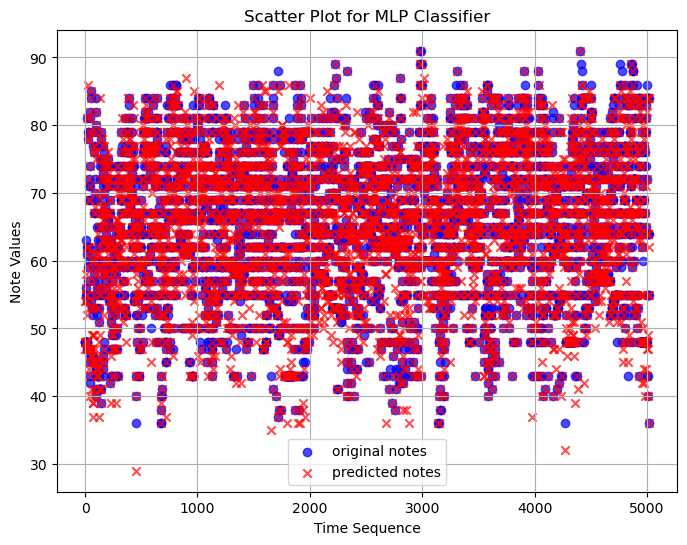

In [124]:
# X-axis values (1 to length of the arrays)
x_values = np.arange(1, len(song_1788_original_notes) + 1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, song_1788_original_notes, color='blue', label='original notes', alpha=0.7, marker='o')
plt.scatter(x_values, y_pred, color='red', label='predicted notes', alpha=0.7, marker='x')

# Adding labels, legend, and grid
plt.xlabel('Time Sequence')
plt.ylabel('Note Values')
plt.title('Scatter Plot for MLP Classifier')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()